In [ ]:
pip install requests

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#loading the dataset
df=pd.read_csv("tesla_dataset.csv")


In [ ]:
# Exploring the dataset
print(df.head())
print(df.info())

         Date       Open   High        Low      Close    Volume  Adj Close
0   6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1   6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2  07-01-2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3  07-02-2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4  07-06-2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [ ]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

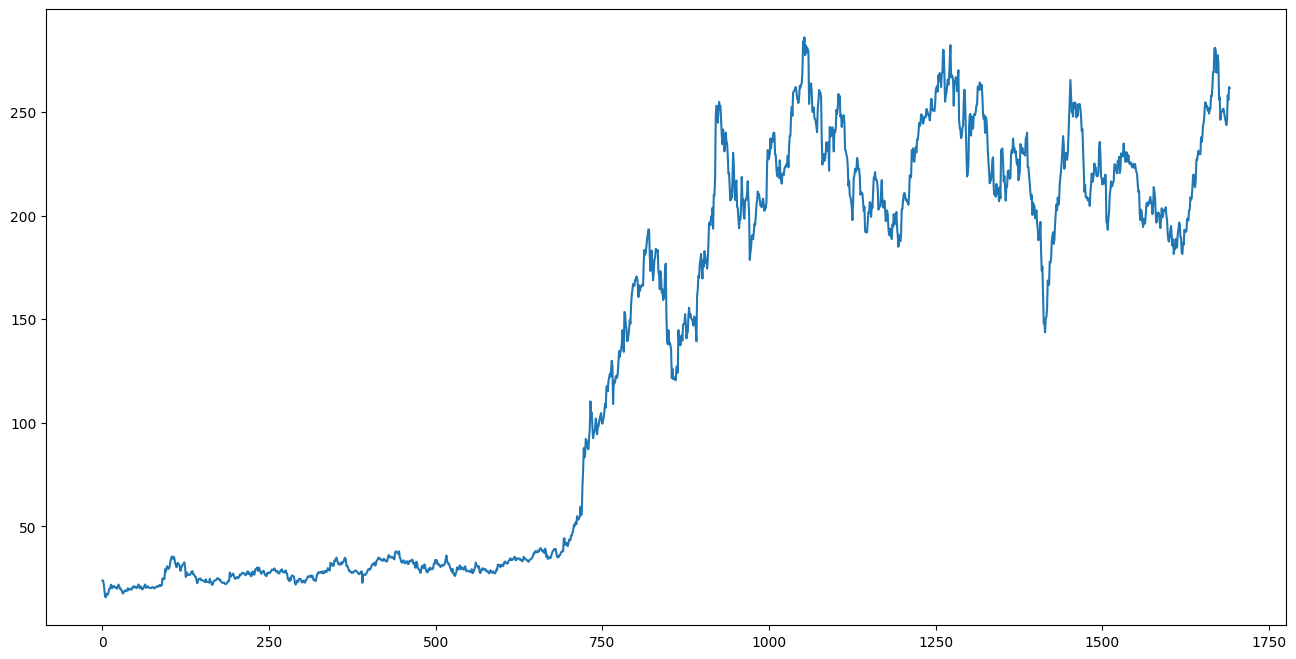

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
# Feature Engineering
df=pd.read_csv("tesla_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Weekday'] = df['Date'].apply(lambda x: 1 if x.dayofweek < 5 else 0)

In [ ]:

# Drop rows with NaN values
df.dropna(inplace=True)

# Split the dataset into features (X) and target variable (y) after feature engineering
X = df.drop(['Date', 'Close'], axis=1)  # Assuming 'Close' is the target variable
y = df['Close']


In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Day_of_Week', 'Weekday']
target = 'Close'

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
# Prepare the training and testing datasets
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.5183316700842617
Test MSE: 6.446355667637584


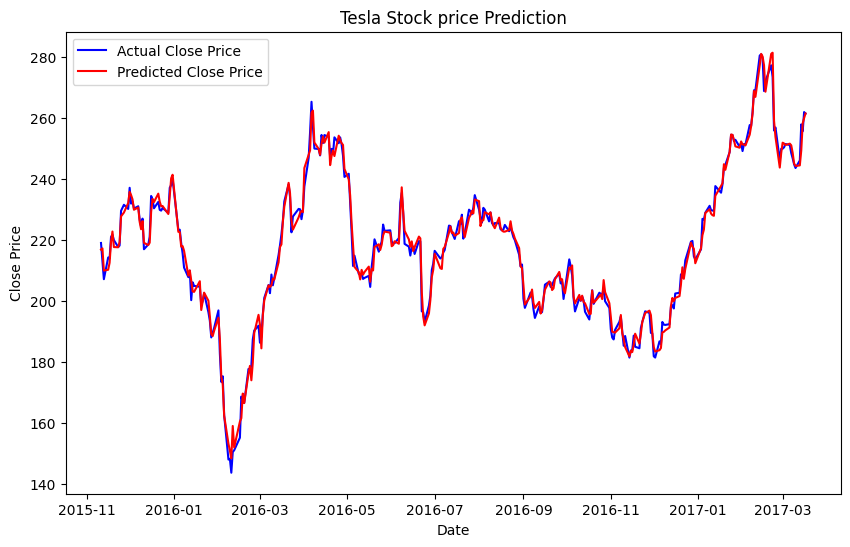

In [ ]:
# Plot actual vs. predicted values

plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='blue')
plt.plot(test_data['Date'], y_pred_test, label='Predicted Close Price', color='red')
plt.title('Tesla Stock price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# New Section